# Clasificaciónde flores Iris

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = datasets.load_iris()
print(iris)

{'target_names': array(['setosa', 'versicolor', 'virginica'], dtype='<U10'), 'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n  

In [3]:
X = iris.data[:, :2]
Y = iris.target

In [4]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
h = (x_max - x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X_plot = np.c_[xx.ravel(), yy.ravel()]

In [5]:
C = 1.0
svc = svm.SVC(kernel="linear", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred= svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

Text(0.5,1,'SVC para las flores de Iris con Kernel Lineal')

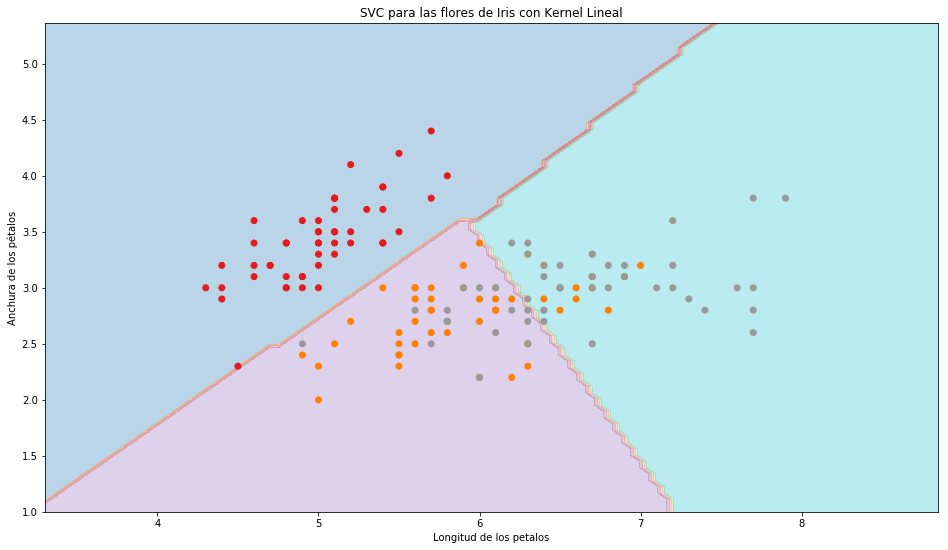

In [11]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Set1)
plt.xlabel("Longitud de los petalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Lineal")

In [30]:
C = 10
svc = svm.SVC(kernel="rbf", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred= svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

C:\Users\51931\anaconda3\envs\cursoml\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5,1,'SVC para las flores de Iris con Kernel Radial')

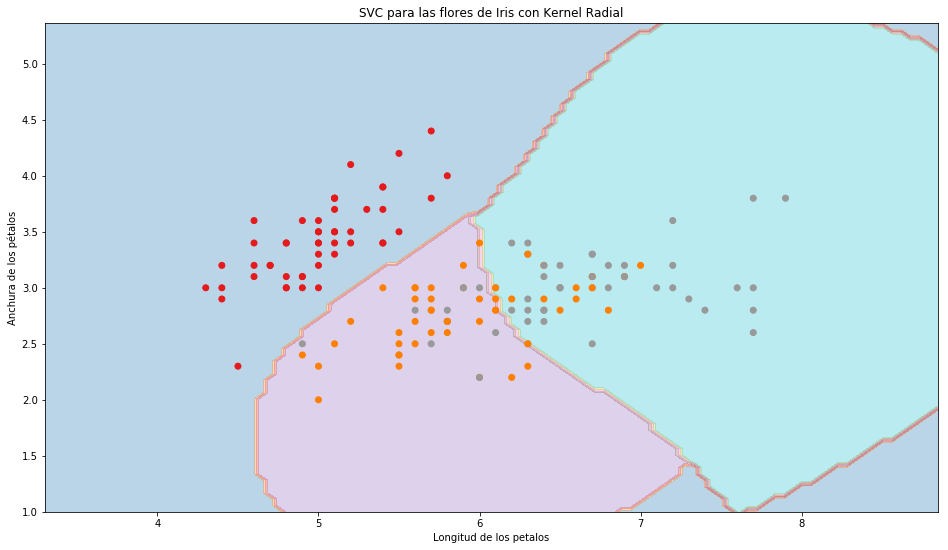

In [31]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Set1)
plt.xlabel("Longitud de los petalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Radial")

C:\Users\51931\anaconda3\envs\cursoml\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5,1,'SVC para las flores de Iris con Kernel Radial')

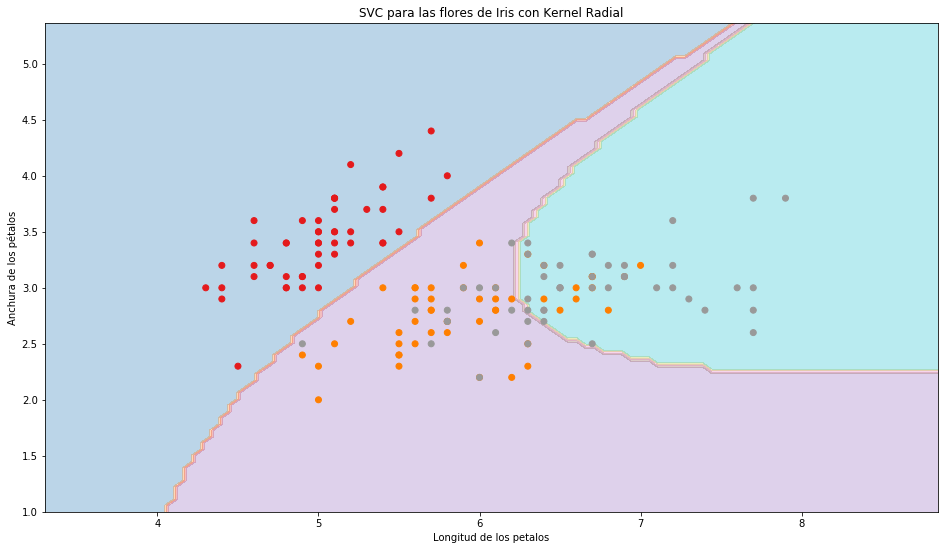

In [17]:
C = 1.0
svc = svm.SVC(kernel="poly", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred= svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Set1)
plt.xlabel("Longitud de los petalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Radial")

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [19]:
X, Y = shuffle(X,Y, random_state = 0)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=0)

In [22]:
parameters = [
    {
        'kernel': ['rbf'],
        'gamma' : [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.5],
        'C' : [1,10,100,1000]
    },
    {
        'kernel':["linear"],
        'C':[1,10,100,1000]
    }
]

In [25]:
clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), param_grid=parameters, cv=5)
clf.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [26]:
clf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [27]:
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
params = clf.cv_results_['params']
for m, s, p in zip(means, stds, params):
    print("%0.3f (+/-%0.3f) para %r"%(m, 2*s, p))

0.747 (+/-0.124) para {'gamma': 0.0001, 'C': 1, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'gamma': 0.001, 'C': 1, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'gamma': 0.01, 'C': 1, 'kernel': 'rbf'}
0.807 (+/-0.129) para {'gamma': 0.1, 'C': 1, 'kernel': 'rbf'}
0.787 (+/-0.124) para {'gamma': 0.2, 'C': 1, 'kernel': 'rbf'}
0.780 (+/-0.116) para {'gamma': 0.5, 'C': 1, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'gamma': 0.0001, 'C': 10, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'gamma': 0.001, 'C': 10, 'kernel': 'rbf'}
0.813 (+/-0.124) para {'gamma': 0.01, 'C': 10, 'kernel': 'rbf'}
0.773 (+/-0.098) para {'gamma': 0.1, 'C': 10, 'kernel': 'rbf'}
0.780 (+/-0.116) para {'gamma': 0.2, 'C': 10, 'kernel': 'rbf'}
0.767 (+/-0.126) para {'gamma': 0.5, 'C': 10, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'gamma': 0.0001, 'C': 100, 'kernel': 'rbf'}
0.813 (+/-0.124) para {'gamma': 0.001, 'C': 100, 'kernel': 'rbf'}
0.760 (+/-0.107) para {'gamma': 0.01, 'C': 100, 'kernel': 'rbf'}
0.780 (+/-0.080) para {'gamma': 0.1, 'C'

In [28]:
y_pred = clf.predict(X_test)

In [29]:
print(classification_report(Y_test, y_pred, target_names=["setosas", "versicolor", "virginica"]))

              precision    recall  f1-score   support

     setosas       1.00      1.00      1.00        11
  versicolor       0.60      0.82      0.69        11
   virginica       0.83      0.62      0.71        16

   micro avg       0.79      0.79      0.79        38
   macro avg       0.81      0.81      0.80        38
weighted avg       0.81      0.79      0.79        38



# Resumen final de la clasificación de Iris

In [32]:
def svm_iris(C=1.0, gamma = 0.01, kernel = "rbf"):
    import pandas as pd
    import numpy as np
    from sklearn import svm, datasets
    import matplotlib.pyplot as plt

    iris = datasets.load_iris()
    
    
    X = iris.data[:, :2]
    Y = iris.target

    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    h = (x_max - x_min)/100

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    X_plot = np.c_[xx.ravel(), yy.ravel()]

    svc = svm.SVC(kernel=kernel, C=C, gamma=gamma, decision_function_shape="ovr").fit(X,Y)
    Ypred = svc.predict(X_plot)
    Ypred = Ypred.reshape(xx.shape)
    plt.figure(figsize=(16,9))
    plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
    plt.xlabel("Longitud de los pétalos")
    plt.ylabel("Anchura de los pétalos")
    plt.xlim(xx.min(), xx.max())
    plt.title("SVC para las flores de Iris con Kernel "+kernel)

In [33]:
from ipywidgets import interact, fixed

In [34]:
interact(svm_iris, C=[0.01, 0.1, 1,10,100,1000, 1e6, 1e10],
        gamma=[1e-5,1e-4,1e-3,1e-2, 0.1, 0.2, 0.5,0.99],
        kernel=["rbf","linear","sigmoid","poly"])

interactive(children=(Dropdown(description='C', index=2, options=(0.01, 0.1, 1, 10, 100, 1000, 1000000.0, 1000…

<function __main__.svm_iris>